# Volume Weighted Average Price (VWAP)

[investopedia link](https://www.investopedia.com/terms/v/vwap.asp)

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

## Importing stock price of Reliance

In [2]:
symbol = 'RELIANCE.NS'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,922.700012,922.700012,907.500000,909.750000,895.929260,4321686
2018-01-02,913.000000,919.549988,906.400024,911.150024,897.308044,4342815
2018-01-03,925.000000,926.000000,913.049988,914.799988,900.902649,6175312
2018-01-04,918.150024,921.799988,915.700012,920.299988,906.319092,4118581
2018-01-05,921.799988,926.900024,920.250000,923.250000,909.224243,3401905


### Defining the VWAP function

                                          VWAP= ∑Price * Volume / ∑Volume

In [3]:
def VWAP(df):
    df['Avg'] = (df['Close']+df['High']+df['Low'])/3
    return ((df['Avg']*df['Volume']).sum()/df['Volume'].sum())

### Applying VWAP function on out dataset for a period of 10 days

In [4]:
n = 14
df['VWAP'] = pd.concat([(pd.Series(VWAP(df.iloc[i:i+n]), index = [df.index[i+n]])) for i in range(len(df)-n)])

In [5]:
df.dropna(inplace = True)  #to remove the missing places 

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2018-01-15,950.000000,958.500000,945.200012,949.150024,934.730774,5084113,928.985414
2018-01-16,947.700012,947.700012,920.000000,922.950012,908.928772,4948895,932.606953
2018-01-17,926.000000,929.000000,907.000000,924.500000,910.455261,6036432,934.124142
2018-01-18,929.000000,929.599976,915.099976,919.700012,905.728149,4289053,934.436682
2018-01-19,923.000000,934.400024,922.099976,931.299988,917.151855,4559564,934.573212


### Graphical representation of VWAP vs Closing price

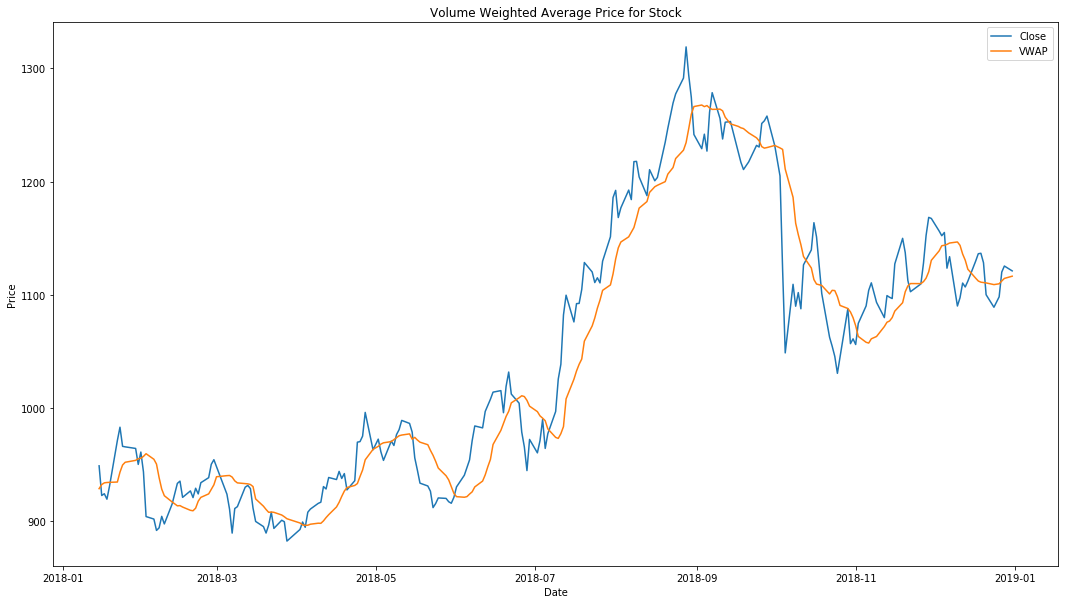

In [7]:
plt.figure(figsize=(18,10))
plt.plot(df['Close'], label = 'Close')
plt.plot(df['VWAP'], label='VWAP')
plt.title('Volume Weighted Average Price for Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'best')
plt.show()